In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

In [24]:
size = 100

# Generate class 0
x = []
y = []
target = []

for i in range(0, size//2):
    x.append(np.random.uniform(0,2.5))
    y.append(np.random.uniform(0,20))
    target.append(0)

for i in range(0, size//2):
    x.append(np.random.uniform(2.5,5))
    y.append(np.random.uniform(20,50))
    target.append(1)

df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)

df_target = pd.DataFrame(target)

df = pd.concat([df_x, df_y], axis=1)
df = pd.concat([df, df_target], axis=1)
df.columns = ['x', 'y', 'target']
df


,x,y,target
0,2.391260,13.362547,0
1,1.075048,13.727075,0
2,2.331448,7.254027,0
3,1.599061,10.800363,0
4,0.365338,7.154379,0
...,...,...,...
95,3.337444,41.203325,1
96,2.975882,30.357658,1
97,4.340967,26.929467,1
98,4.148460,33.502146,1


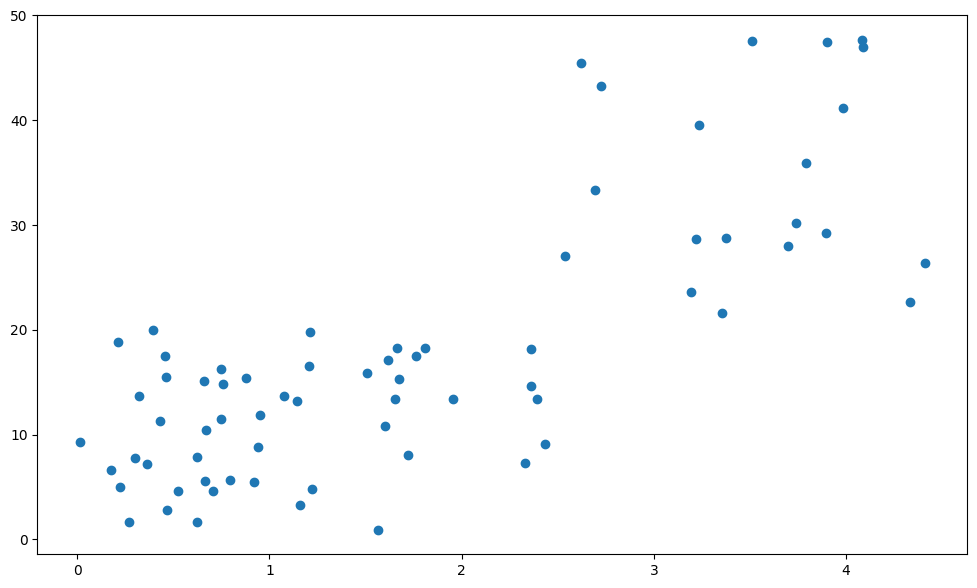

In [25]:
features = df[['x', 'y']]
label = df['target']

t_size = int(np.round(size*0.3))

x_train = features[:-t_size].values
y_train = label[:-t_size].values

x_test = features[-t_size:].values
y_test = features[-t_size:].values

fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(features[:-t_size]['x'], features[:-t_size]['y'])

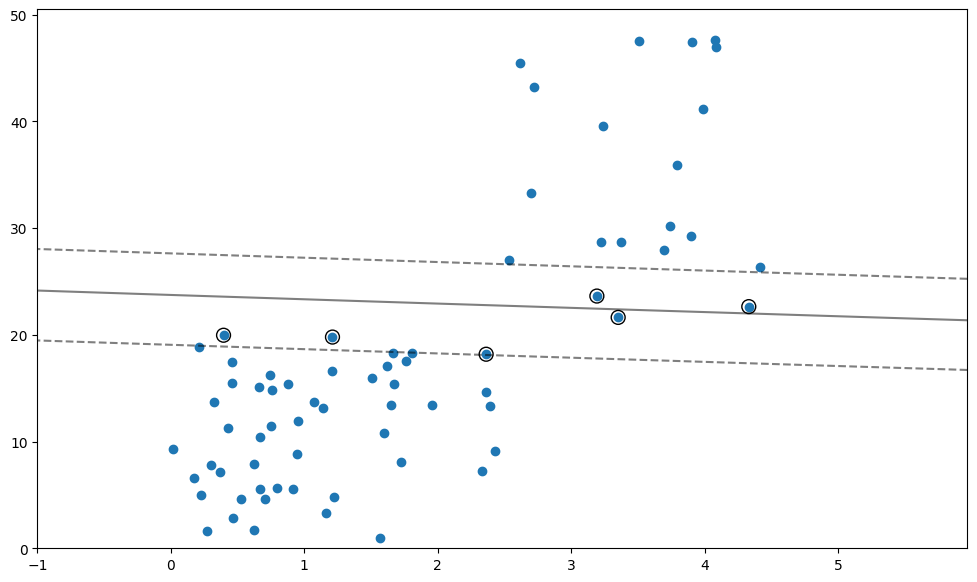

In [30]:
from sklearn import svm
model = svm.SVC(kernel='poly', degree=2)
model.fit(x_train, y_train)

xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

z = model.decision_function(xy).reshape(XX.shape)

fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(features[:-t_size]['x'], features[:-t_size]['y'])
ax.contour(XX, YY, z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')


In [28]:
plt.show()